In [136]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [137]:
import numpy as np
import pandas as pd

In [ ]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [139]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.087600,AGCGTGGGCAC,GTGCCCACGCA,"[['A', 'D', 'D', 'A'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'n', 'A'], ['A', 'D', 'A', 'x'], [..."
1,AA,2,-0.225439,AACGTGGGCAC,GTGCCCACGAT,"[['A', 'D', 'A', 'M'], ['A', 'D', 'D', 'A'], [...","[['A', 'n', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.539564,AGAGTGGGCAC,GTGCCCACACT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
3,AA,4,-0.982107,AGCATGGGCAC,GTGCCCAAGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
4,AA,5,-0.420906,AGCGAGGGCAC,GTGCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
...,...,...,...,...,...,...,...
963,gg,7,-0.890133,AGCGTGgGCAC,GTGCgCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
964,gg,8,-0.701125,AGCGTGGgCAC,GTGgCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
965,gg,9,-0.415841,AGCGTGGGgAC,GTgCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
966,gg,10,-0.155906,AGCGTGGGCgC,GgGCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."


In [140]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [141]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [142]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.087600,AGCGTGGGCAC,GTGCCCACGCA,"[[A, D, D, A], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, n, A], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.225439,AACGTGGGCAC,GTGCCCACGAT,"[[A, D, A, M], [A, D, D, A], [n, D, A, A], [A,...","[[A, n, A, x], [A, n, n, A], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.539564,AGAGTGGGCAC,GTGCCCACACT,"[[A, D, A, M], [A, A, D, n], [A, D, D, A], [A,...","[[A, n, A, x], [A, D, A, x], [A, n, n, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
3,AA,4,-0.982107,AGCATGGGCAC,GTGCCCAAGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
4,AA,5,-0.420906,AGCGAGGGCAC,GTGCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
963,gg,7,-0.890133,AGCGTGgGCAC,GTGCgCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
964,gg,8,-0.701125,AGCGTGGgCAC,GTGgCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
965,gg,9,-0.415841,AGCGTGGGgAC,GTgCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
966,gg,10,-0.155906,AGCGTGGGCgC,GgGCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."


In [143]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [144]:
df.iloc[0]["encoded_sequence"].shape

(11, 8, 4)

In [145]:
# Determine all available modifications (excluding mismatches) that will be held out one-by-one
available_mods = sorted(cat for cat in df['Category'].unique() if cat != 'mismatch')
print(f'Available modifications to exclude: {available_mods}')
print(f'Total unique modifications (excluding mismatch): {len(available_mods)}')


Available modifications to exclude: ['5mC', '6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mod_on_both_bases']
Total unique modifications (excluding mismatch): 8


In [146]:
def flatten_tensor(array):
    n_samples = array.shape[0]
    return array.reshape((n_samples, -1))


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [148]:
all_predictions = []
metrics_summary = []

for mod in available_mods:
    mask_test = df['Category'] == mod
    df_test = df[mask_test].copy()
    df_train = df[~mask_test].copy()

    if df_test.empty:
        print(f'Skipping {mod} because no held-out samples are available.')
        continue
    if df_train.empty:
        print(f'Skipping {mod} because no training samples remain.')
        continue

    X_train = np.stack(df_train['encoded_sequence'].to_numpy(), axis=0)
    y_train = df_train['ln(I)'].to_numpy()
    X_test = np.stack(df_test['encoded_sequence'].to_numpy(), axis=0)
    y_test = df_test['ln(I)'].to_numpy()

    X_train_flat = flatten_tensor(X_train)
    X_test_flat = flatten_tensor(X_test)

    linear_reg = LinearRegression()
    linear_reg.fit(X_train_flat, y_train)

    train_r2 = linear_reg.score(X_train_flat, y_train)

    cv_mean = None
    n_splits = min(5, len(df_train))
    if n_splits >= 2:
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)
        cv_scores = cross_val_score(linear_reg, X_train_flat, y_train, cv=kfold)
        cv_mean = cv_scores.mean()

    y_pred = linear_reg.predict(X_test_flat)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    df_mod = df_test.copy()
    df_mod['y_pred'] = y_pred
    df_mod['ExcludedMod'] = mod
    all_predictions.append(df_mod[['ln(I)', 'y_pred', 'ExcludedMod']])

    metrics_summary.append({
        'ExcludedMod': mod,
        'TrainSamples': len(df_train),
        'TestSamples': len(df_test),
        'Train_R2': train_r2,
        'CV_Mean': cv_mean,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
    })

metrics_df = pd.DataFrame(metrics_summary)
metrics_df


,ExcludedMod,TrainSamples,TestSamples,Train_R2,CV_Mean,MAE,MSE,R2
0,5mC,880,88,0.791118,0.692398,0.697555,0.723712,-0.212528
1,6mA,880,88,0.756485,0.630655,0.221260,0.082525,0.453249
2,7dA,880,88,0.756705,0.644495,0.249716,0.095583,0.442331
3,7dG,880,88,0.766202,0.660948,0.255145,0.102671,0.119868
4,D,880,88,0.678323,0.534712,0.591746,0.518685,0.293849
5,I,880,88,0.761110,0.629542,0.242716,0.103816,0.064862
6,dUTP,880,88,0.847472,0.767044,0.795954,1.013174,-0.541077
7,mod_on_both_bases,792,176,0.758254,0.613498,0.216386,0.081691,0.488081


In [149]:
metrics_df.sort_values('R2', ascending=False)

,ExcludedMod,TrainSamples,TestSamples,Train_R2,CV_Mean,MAE,MSE,R2
7,mod_on_both_bases,792,176,0.758254,0.613498,0.216386,0.081691,0.488081
1,6mA,880,88,0.756485,0.630655,0.221260,0.082525,0.453249
2,7dA,880,88,0.756705,0.644495,0.249716,0.095583,0.442331
4,D,880,88,0.678323,0.534712,0.591746,0.518685,0.293849
3,7dG,880,88,0.766202,0.660948,0.255145,0.102671,0.119868
5,I,880,88,0.761110,0.629542,0.242716,0.103816,0.064862
0,5mC,880,88,0.791118,0.692398,0.697555,0.723712,-0.212528
6,dUTP,880,88,0.847472,0.767044,0.795954,1.013174,-0.541077


In [150]:
combined_predictions = pd.concat(all_predictions, ignore_index=True)
combined_predictions.head()


,ln(I),y_pred,ExcludedMod
0,-0.336654,-0.164976,5mC
1,-0.715233,0.119408,5mC
2,-1.690570,-0.217163,5mC
3,-2.181283,-0.505207,5mC
4,-1.586359,-0.133240,5mC


In [151]:
combined_predictions['ExcludedMod'].value_counts()


ExcludedMod
mod_on_both_bases    176
5mC                   88
7dA                   88
6mA                   88
7dG                   88
D                     88
I                     88
dUTP                  88
Name: count, dtype: int64

In [152]:
metrics_df[['ExcludedMod', 'MAE', 'MSE', 'R2']]


,ExcludedMod,MAE,MSE,R2
0,5mC,0.697555,0.723712,-0.212528
1,6mA,0.221260,0.082525,0.453249
2,7dA,0.249716,0.095583,0.442331
3,7dG,0.255145,0.102671,0.119868
4,D,0.591746,0.518685,0.293849
5,I,0.242716,0.103816,0.064862
6,dUTP,0.795954,1.013174,-0.541077
7,mod_on_both_bases,0.216386,0.081691,0.488081


In [153]:
metrics_df[['ExcludedMod', 'TrainSamples', 'TestSamples']]


,ExcludedMod,TrainSamples,TestSamples
0,5mC,880,88
1,6mA,880,88
2,7dA,880,88
3,7dG,880,88
4,D,880,88
5,I,880,88
6,dUTP,880,88
7,mod_on_both_bases,792,176


In [154]:
# Placeholder cell for backward compatibility


In [155]:
metrics_df[['ExcludedMod', 'R2']].set_index('ExcludedMod')


,R2
ExcludedMod,
5mC,-0.212528
6mA,0.453249
7dA,0.442331
7dG,0.119868
D,0.293849
I,0.064862
dUTP,-0.541077
mod_on_both_bases,0.488081


In [156]:
# Combined predictions already computed


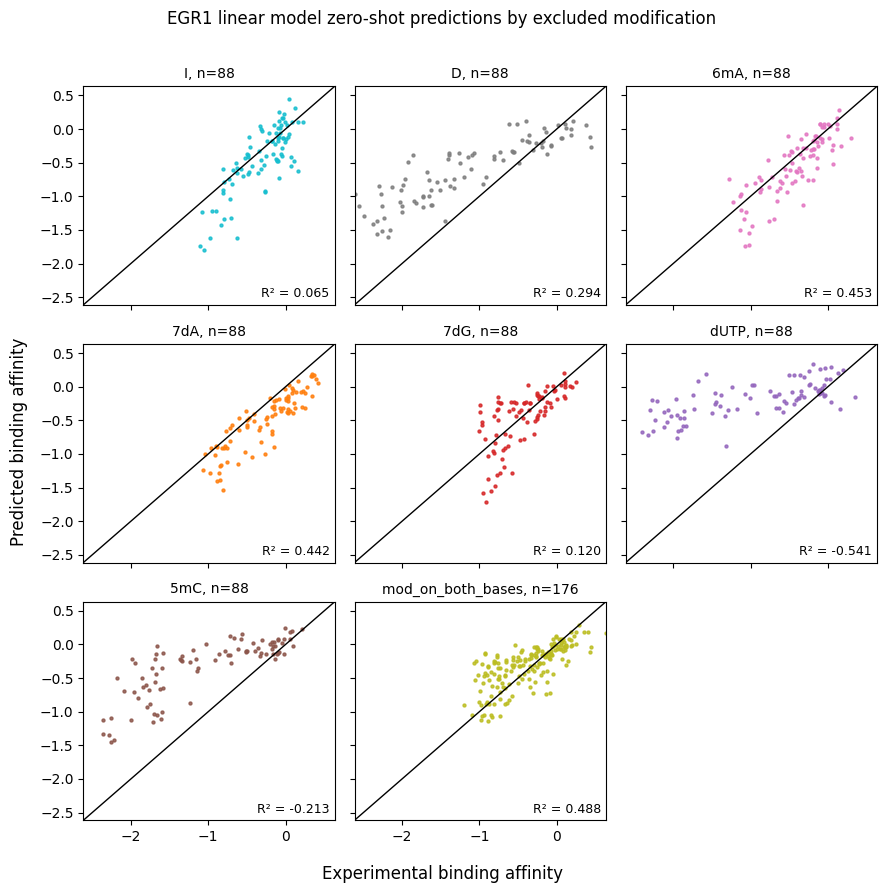

In [157]:
# 3x3 grid of individual prediction scatter plots (one per excluded modification)
from matplotlib import pyplot as plt
from src.constants import COLOR_MODS

mods_for_plot = sorted(combined_predictions['ExcludedMod'].unique())

order = [c for c in COLOR_MODS.keys() if c in mods_for_plot]
order.extend([c for c in mods_for_plot if c not in order])
colors = {cat: COLOR_MODS.get(cat, None) for cat in order}


nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()

# Global axis limits for consistency across subplots
p1 = max(combined_predictions['ln(I)'].max(), combined_predictions['y_pred'].max())
p2 = min(combined_predictions['ln(I)'].min(), combined_predictions['y_pred'].min())


# Plot in specified 'order' instead of mods_for_plot
for i, mod in enumerate(order):
    ax = axes[i]
    subset = combined_predictions[combined_predictions['ExcludedMod'] == mod]
    if subset.empty:
        ax.axis('off')
        continue

    ax.plot([p2, p1], [p2, p1], 'k', linewidth=1)
    ax.scatter(subset['ln(I)'], subset['y_pred'], s=18, marker='.', alpha=0.85, color=colors.get(mod))

    r2_cat = r2_score(subset['ln(I)'], subset['y_pred'])
    ax.text(0.98, 0.02, f"R² = {r2_cat:.3f}" if r2_cat == r2_cat else "R² = N/A",
            transform=ax.transAxes, ha="right", va="bottom",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7), fontsize=9)

    ax.set_title(f"{mod}, n={len(subset)}", fontsize=10)
    ax.set_xlim(p2, p1)
    ax.set_ylim(p2, p1)

# Turn off any remaining unused axes
for j in range(len(order), len(axes)):
    axes[j].axis('off')



fig.suptitle(f"{TF} linear model zero-shot predictions by excluded modification", fontsize=12)
fig.supxlabel('Experimental binding affinity')
fig.supylabel('Predicted binding affinity')


plt.tight_layout(rect=[0, 0, 1, 0.97])

os.makedirs('plots', exist_ok=True)
plt.savefig(f"plots/{TF}_linear_zeroshot_excluding_all_mods_grid.pdf")
plt.show()
